<a href="https://colab.research.google.com/github/erassmirza/TTDS/blob/main/Project/TTDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATLIQ GRANDS

## Problem Statement

Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, Atliq Grands are losing its market share and revenue in the luxury/business hotels category. As a strategic move, the managing director of Atliq Grands wanted to incorporate “Business and Data Intelligence” in order to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights.

Their revenue management team had decided to hire a 3rd party service provider to provide them insights from their historical data.

* Domain:  Hospitality

* Function: Revenue


## Description of Data

The meta information regarding the columns described in the CSV files. we have provided 5 CSV files:
1. dim_date
2. dim_hotels
3. dim_rooms
4. fact_aggregated_bookings
5. fact_bookings


Column Description for dim_date:
1. date: This column represents the dates present in May, June and July.
2. mmm yy: This column represents the date in the format of mmm yy (monthname year).
3. week no: This column represents the unique week number for that particular date.
4. day_type: This column represents whether the given day is Weekend or Weekeday.



Column Description for dim_hotels:
1. property_id: This column represents the Unique ID for each of the hotels.
2. property_name: This column represents the name of each hotel.
3. category: This column determines which class[Luxury, Business] a particular hotel/property belongs to. 
4. city: This column represents where the particular hotel/property resides in.



Column Description for dim_rooms:
1. room_id: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.
2. room_class: This column represents to which class[Standard, Elite, Premium, Presidential] particular room type belongs.


Column Description for fact_aggregated_bookings:
1. property_id: This column represents the Unique ID for each of the hotels.
2. check_in_date: This column represents all the check_in_dates of the customers.
3. room_category: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.
4. successful_bookings: This column represents all the successful room bookings that happen for a particular room type in that hotel on that particular date.
5. capacity: This column represents the maximum count of rooms available for a particular room type in that hotel on that particular date.



Column Description for fact_bookings:
1. booking_id: This column represents the Unique Booking ID for each customer when they booked their rooms.
2. property_id: This column represents the Unique ID for each of the hotels
3. booking_date: This column represents the date on which the customer booked their rooms.
4. check_in_date: This column represents the date on which the customer check-in(entered) at the hotel.
5. check_out_date: This column represents the date on which the customer check-out(left) of the hotel.
6. no_guests: This column represents the number of guests who stayed in a particular room in that hotel.
7. room_category: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.
8. booking_platform: This column represents in which way the customer booked his room.
9. ratings_given: This column represents the ratings given by the customer for hotel services.
10. booking_status: This column represents whether the customer cancelled his booking[Cancelled], successfully stayed in the hotel[Checked Out] or booked his room but not stayed in the hotel[No show].
11. revenue_generated: This column represents the amount of money generated by the hotel from a particular customer.
12. revenue_realized: This column represents the final amount of money that goes to the hotel based on booking status. If the booking status is cancelled, then 40% of the revenue generated is deducted and the remaining is refunded to the customer. If the booking status is Checked Out/No show, then full revenue generated will goes to hotels.





## Import Libraries

In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [503]:
dim_date = pd.read_csv('https://raw.githubusercontent.com/erassmirza/TTDS/main/Project/dim_date.csv')
dim_hotels = pd.read_csv('https://raw.githubusercontent.com/erassmirza/TTDS/main/Project/dim_hotels.csv')
dim_rooms = pd.read_csv('https://raw.githubusercontent.com/erassmirza/TTDS/main/Project/dim_rooms.csv')
fact_aggr_bookings = pd.read_csv('https://raw.githubusercontent.com/erassmirza/TTDS/main/Project/fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('https://raw.githubusercontent.com/erassmirza/TTDS/main/Project/fact_bookings.csv')


## Data Discovery

### Date Details

In [504]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [505]:
dim_date.shape

(92, 4)

In [506]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


### Hotel Details

In [507]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [508]:
dim_hotels.shape

(25, 4)

In [509]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


### Rooms Details

In [510]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [511]:
dim_rooms.shape

(4, 2)

In [512]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


### Aggr Bookings Details

In [513]:
fact_aggr_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [514]:
fact_aggr_bookings.shape

(9200, 5)

In [515]:
fact_aggr_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


### Bookings Details

In [516]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [517]:
fact_bookings.shape

(134590, 12)

In [518]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


## Data Structuring

### Date Table

In [519]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [520]:
# Conversion of Date from object data type to datetime
dim_date.date = dim_date.date.apply(pd.to_datetime)

In [521]:
# Conversion of Week No from object data type to int64
dim_date['week no'] = dim_date['week no'].str.extract('(\d+)').astype('int64')

In [522]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     int64         
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ KB


In [523]:
dim_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,19,weekend
1,2022-05-02,May 22,19,weekeday
2,2022-05-03,May 22,19,weekeday
3,2022-05-04,May 22,19,weekeday
4,2022-05-05,May 22,19,weekeday


### Aggr Bookings Table

In [524]:
fact_aggr_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [525]:
# Conversion of Date from object data type to datetime
fact_aggr_bookings.check_in_date = fact_aggr_bookings.check_in_date.apply(pd.to_datetime)

In [526]:
fact_aggr_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 359.5+ KB


In [527]:
fact_aggr_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,13,19
4,16558,2022-05-01,RT1,18,19


### Bookings Table

In [528]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [529]:
# Conversion of Date from object data type to datetime
fact_bookings.booking_date = fact_bookings.booking_date.apply(pd.to_datetime)

In [530]:
# Conversion of Date from object data type to datetime
fact_bookings.check_in_date = fact_bookings.check_in_date.apply(pd.to_datetime)

In [531]:
# Conversion of Date from object data type to datetime
fact_bookings.checkout_date = fact_bookings.checkout_date.apply(pd.to_datetime)

In [532]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 12.3+ MB


## Data Exploration

### Checking Missing Values

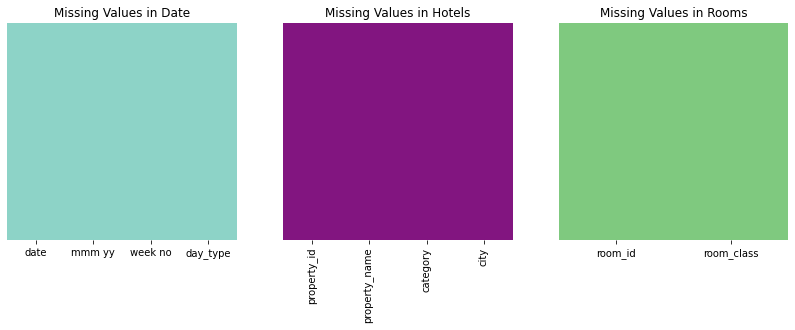

In [533]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.title('Missing Values in Date')
color = sns.color_palette("Set3")
sns.heatmap(dim_date.isnull(), cmap = color, yticklabels=False, cbar=False)

plt.subplot(1,3,2)
plt.title('Missing Values in Hotels')
color = sns.color_palette("BuPu_r")
sns.heatmap(dim_hotels.isnull(), cmap = color, yticklabels=False, cbar=False)

plt.subplot(1,3,3)
plt.title('Missing Values in Rooms')
color = sns.color_palette("Accent")
sns.heatmap(dim_rooms.isnull(), cmap = color, yticklabels=False, cbar=False)

plt.show()

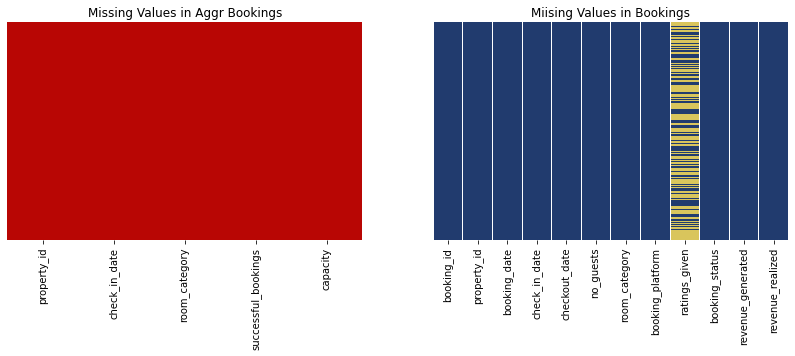

In [534]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title('Missing Values in Aggr Bookings')
color = sns.color_palette("OrRd_r")
sns.heatmap(fact_aggr_bookings.isnull(), cmap = color, yticklabels=False, cbar=False)

plt.subplot(1,2,2)
plt.title('Miising Values in Bookings')
color = sns.color_palette("cividis")
sns.heatmap(fact_bookings.isnull(), cmap = color, yticklabels=False, cbar=False)

plt.show()

In [535]:
na_rat_giv = fact_bookings.ratings_given.isnull().sum() / fact_bookings.shape[0] * 100

Note: Only missing values are there in *Ratings given* that is **58 %**

### Combine Tables

In [536]:
property_details = fact_aggr_bookings.merge(dim_hotels, how='outer')

In [537]:
property_details = property_details.merge(dim_rooms, how = 'outer', 
                                          left_on='room_category', 
                                          right_on='room_id'
                                          ).drop('room_id', axis = 1)

In [538]:
property_details.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_class
0,16559,2022-05-01,RT1,25,30,Atliq Exotica,Luxury,Mumbai,Standard
1,16559,2022-05-02,RT1,20,30,Atliq Exotica,Luxury,Mumbai,Standard
2,16559,2022-05-03,RT1,17,30,Atliq Exotica,Luxury,Mumbai,Standard
3,16559,2022-05-04,RT1,21,30,Atliq Exotica,Luxury,Mumbai,Standard
4,16559,2022-05-05,RT1,16,30,Atliq Exotica,Luxury,Mumbai,Standard


In [539]:
fact_bookings = fact_bookings.merge(dim_date, how = 'outer', 
                                    left_on = 'check_in_date', 
                                    right_on = 'date'
                                    )

In [540]:
fact_bookings.drop('date', axis = 1, inplace = True)

In [541]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,May 22,19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,May 22,19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,May 22,19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,May 22,19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,May 22,19,weekend


In [542]:
df = fact_bookings.merge(property_details, how = 'outer')
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,mmm yy,week no,day_type,successful_bookings,capacity,property_name,category,city,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,10010,May 22,19,weekend,18,19,Atliq Grands,Luxury,Delhi,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,May 22,19,weekend,18,19,Atliq Grands,Luxury,Delhi,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,9100,May 22,19,weekend,18,19,Atliq Grands,Luxury,Delhi,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,3640,May 22,19,weekend,18,19,Atliq Grands,Luxury,Delhi,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,10920,May 22,19,weekend,18,19,Atliq Grands,Luxury,Delhi,Standard


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booking_id           134590 non-null  object        
 1   property_id          134590 non-null  int64         
 2   booking_date         134590 non-null  datetime64[ns]
 3   check_in_date        134590 non-null  datetime64[ns]
 4   checkout_date        134590 non-null  datetime64[ns]
 5   no_guests            134590 non-null  int64         
 6   room_category        134590 non-null  object        
 7   booking_platform     134590 non-null  object        
 8   ratings_given        56683 non-null   float64       
 9   booking_status       134590 non-null  object        
 10  revenue_generated    134590 non-null  int64         
 11  revenue_realized     134590 non-null  int64         
 12  mmm yy               134590 non-null  object        
 13  week no       

## Data Analysis

### Bookings

#### Booking by Platform

In [544]:
bookings_by_platform = df.groupby('booking_platform')['no_guests'].sum().reset_index().sort_values(by = 'no_guests', ascending = False)
bookings_by_platform.no_guests = bookings_by_platform.no_guests / bookings_by_platform.no_guests.sum() * 100
bookings_by_platform

,booking_platform,no_guests
5,others,40.862863
4,makeyourtrip,19.982928
3,logtrip,10.900873
1,direct online,9.961187
6,tripster,7.253752
2,journey,6.029533
0,direct offline,5.008864


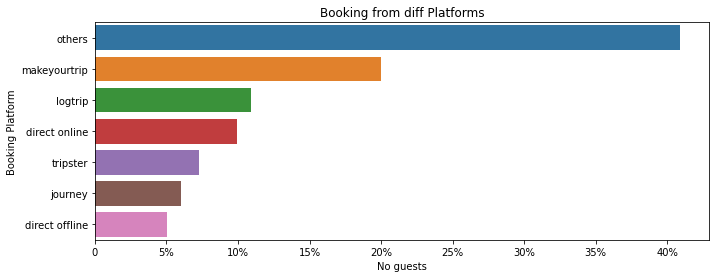

In [545]:
# Plotting
plt.figure(figsize=(11,4))
plot = sns.barplot(y='booking_platform', x='no_guests', data = bookings_by_platform)
plt.xlabel('No guests')
plt.ylabel('Booking Platform')
plt.title('Booking from diff Platforms')
plot.set_xticklabels(['0', '5%', '10%', '15%',
                   '20%', '25%', '30%', '35%', '40%'])
plt.show()

#### Occupancy by Property Name

In [546]:
df['occupancy_perc'] = df.successful_bookings / df.capacity * 100
df.occupancy_perc

0         94.736842
1         94.736842
2         94.736842
3         94.736842
4         94.736842
            ...    
134585    58.823529
134586    58.823529
134587    58.823529
134588    58.823529
134589    58.823529
Name: occupancy_perc, Length: 134590, dtype: float64

In [586]:
occ_by_prop_name = df.groupby('property_name')['occupancy_perc'].mean().reset_index().sort_values(by = 'occupancy_perc', ascending = False)
occ_by_prop_name

,property_name,occupancy_perc
1,Atliq Blu,65.479591
5,Atliq Palace,63.390959
2,Atliq City,62.962652
0,Atliq Bay,62.461621
3,Atliq Exotica,61.496971
4,Atliq Grands,56.032315
6,Atliq Seasons,46.749176


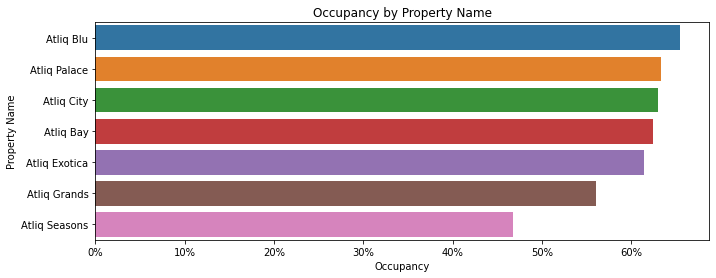

In [587]:
# Plotting
plt.figure(figsize=(11,4))
plot = sns.barplot(y='property_name', x='occupancy_perc', data = occ_by_prop_name)
plt.xlabel('Occupancy')
plt.ylabel('Property Name')
plt.title('Occupancy by Property Name')
plot.set_xticklabels(['0%', '10%', '20%', '30%',
                   '40%', '50%', '60%', '70%', '80%'])
plt.show()

#### Occupancy by Day Type

In [549]:
occ_by_day_type = df.groupby('day_type')['occupancy_perc'].mean().reset_index()
occ_by_day_type

,day_type,occupancy_perc
0,weekeday,53.237194
1,weekend,76.059113


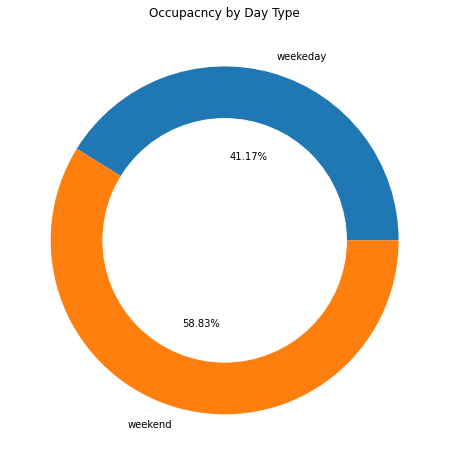

In [550]:
# Plotting
plt.figure(figsize=(8,8))
plt.pie(occ_by_day_type['occupancy_perc'], labels=occ_by_day_type['day_type'],
        autopct='%1.2f%%', pctdistance=0.5)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Occupacncy by Day Type')
plt.show()

#### Occupancy by Property Name with categorized by Room Class

In [551]:
occupancy_by_prop_cat_room_class = df.groupby(['property_name','room_class'])['occupancy_perc'].mean().reset_index()
occupancy_by_prop_cat_room_class

,property_name,room_class,occupancy_perc
0,Atliq Bay,Elite,60.944206
1,Atliq Bay,Premium,62.514877
2,Atliq Bay,Presidential,66.187590
3,Atliq Bay,Standard,62.489399
4,Atliq Blu,Elite,65.157233
5,Atliq Blu,Premium,65.597861
6,Atliq Blu,Presidential,67.653243
7,Atliq Blu,Standard,65.202828
8,Atliq City,Elite,63.014321
9,Atliq City,Premium,62.582597


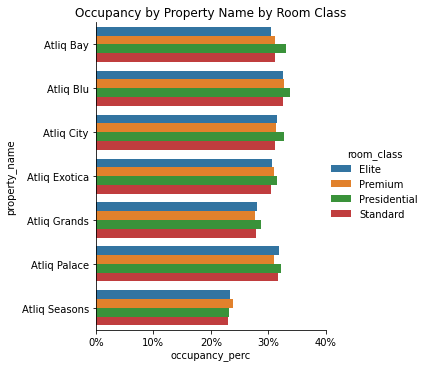

In [552]:
# Plotting
plot = sns.catplot(y="property_name", x="occupancy_perc", hue="room_class", data=occupancy_by_prop_cat_room_class, kind="bar")
plt.title('Occupancy by Property Name by Room Class')
plot.set_xticklabels(['0%', '10%', '20%', '30%',
                   '40%', '50%', '60%', '70%', '80%'])
plt.show()

#### Occupancy by Property Name with categorized by City

In [553]:
occupancy_by_prop_cat_city = df.groupby(['property_name','city'])['occupancy_perc'].mean().reset_index()
occupancy_by_prop_cat_city

,property_name,city,occupancy_perc
0,Atliq Bay,Bangalore,68.999398
1,Atliq Bay,Delhi,55.905413
2,Atliq Bay,Hyderabad,68.868465
3,Atliq Bay,Mumbai,46.872242
4,Atliq Blu,Bangalore,55.816520
5,Atliq Blu,Delhi,68.903260
6,Atliq Blu,Hyderabad,68.732645
7,Atliq Blu,Mumbai,69.202026
8,Atliq City,Bangalore,68.780437
9,Atliq City,Delhi,56.147140


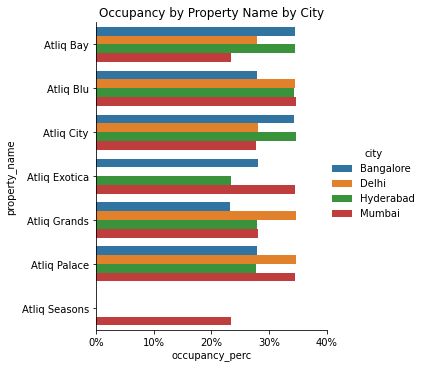

In [554]:
# Plotting
plot = sns.catplot(y="property_name", x="occupancy_perc", hue="city", data=occupancy_by_prop_cat_city, kind="bar")
plt.title('Occupancy by Property Name by City')
plot.set_xticklabels(['0%', '10%', '20%', '30%',
                   '40%', '50%', '60%', '70%', '80%'])
plt.show()

#### Cancellation Rate

In [555]:
cancellation_rate = df.groupby('check_in_date')['booking_status'].apply(lambda x: (x == 'Cancelled').sum() / len(x) * 100).reset_index()
cancellation_rate

,check_in_date,booking_status
0,2022-05-01,24.837905
1,2022-05-02,26.080692
2,2022-05-03,25.054152
3,2022-05-04,25.541126
4,2022-05-05,25.336164
...,...,...
87,2022-07-27,24.407375
88,2022-07-28,25.108225
89,2022-07-29,22.433132
90,2022-07-30,23.137973


In [556]:
# For May
start_date = '2022-05-01'
end_date = '2022-05-31'
cancellation_rate_may = cancellation_rate.query('check_in_date >= @start_date and check_in_date <= @end_date')

# For June
start_date = '2022-06-01'
end_date = '2022-06-30'
cancellation_rate_june = cancellation_rate.query('check_in_date >= @start_date and check_in_date <= @end_date')

# For July
start_date = '2022-07-01'
end_date = '2022-07-31'
cancellation_rate_july = cancellation_rate.query('check_in_date >= @start_date and check_in_date <= @end_date')

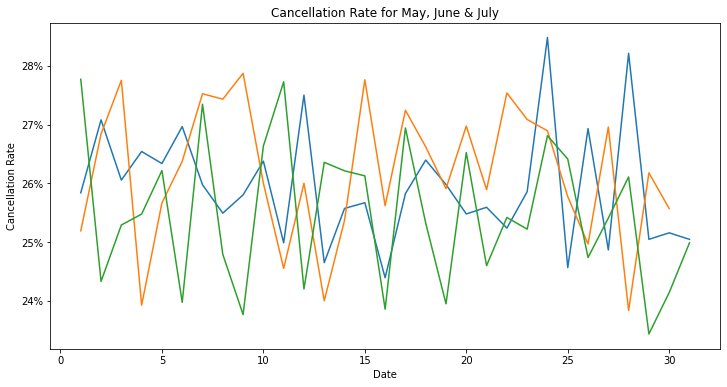

In [557]:
#Plotting
plt.figure(figsize=(12,6))
plot = sns.lineplot(x=range(1,32), y="booking_status", data=cancellation_rate_may)
plot = sns.lineplot(x=range(1,31), y="booking_status", data=cancellation_rate_june)
plot = sns.lineplot(x=range(1,32), y="booking_status", data=cancellation_rate_july)
plt.title('Cancellation Rate for May, June & July')
plot.set_yticklabels(['23%', '24%', '25%', '26%',
                   '27%', '28%', '29%', '30%', '31%'])
plt.xlabel('Date')
plt.ylabel('Cancellation Rate')
plt.show()

#### Comparison of Bookings & Cancellations

In [558]:
df['bookings'] = df.booking_status.map({'Cancelled':0, 'Checked Out':1, 'No Show': 1})

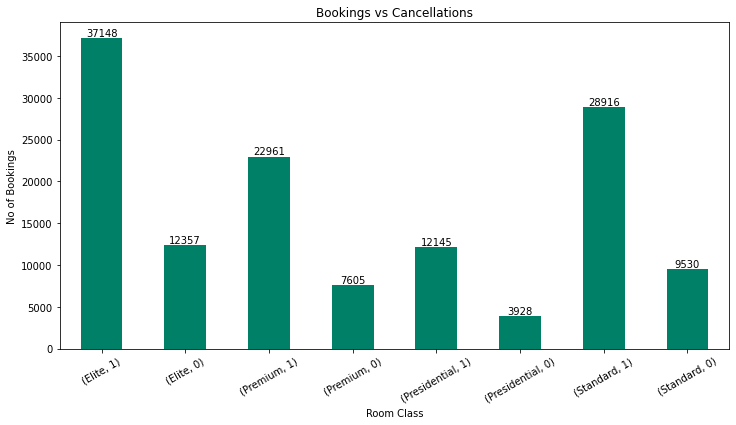

In [559]:
booking_status = df.groupby('room_class')['bookings'].value_counts()
plt.figure(figsize=(12,6))
booking_status.plot(kind='bar', rot = 30, colormap='summer')
for i in range(len(booking_status)):
    count = booking_status.values[i]
    label = count
    plt.annotate(label, (i, count), ha = 'center', va='bottom')
plt.ylabel('No of Bookings')
plt.xlabel('Room Class')
plt.title('Bookings vs Cancellations')
plt.show()

#### Ratings

In [560]:
df_checked_out = df[df.booking_status == 'Checked Out']
df_ratings_given = df_checked_out[~df_checked_out.ratings_given.isnull()]

In [561]:
ratings_by_city = df_ratings_given.groupby('city')['ratings_given'].mean().reset_index().sort_values(by = 'ratings_given', ascending = False)
ratings_by_city

,city,ratings_given
1,Delhi,3.779015
2,Hyderabad,3.661132
3,Mumbai,3.650455
0,Bangalore,3.407681


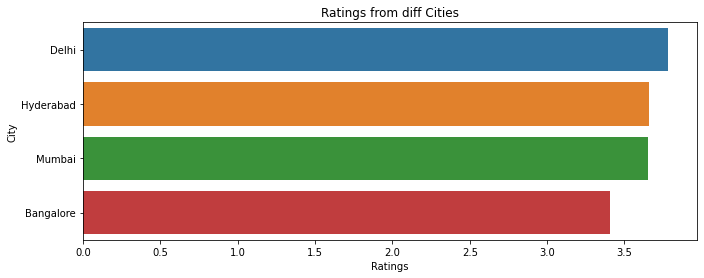

In [562]:
# Plotting
plt.figure(figsize=(11,4))
plot = sns.barplot(y='city', x='ratings_given', data = ratings_by_city)
plt.xlabel('Ratings')
plt.ylabel('City')
plt.title('Ratings from diff Cities')
plt.show()

### Revenue generated

#### Revenue by Property Name

In [568]:
revenue_by_property = df.groupby('property_name')['revenue_realized'].sum().sort_values()
revenue_by_property

property_name
Atliq Seasons     66125495
Atliq Grands     211532764
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Palace     304081863
Atliq Exotica    320312468
Name: revenue_realized, dtype: int64

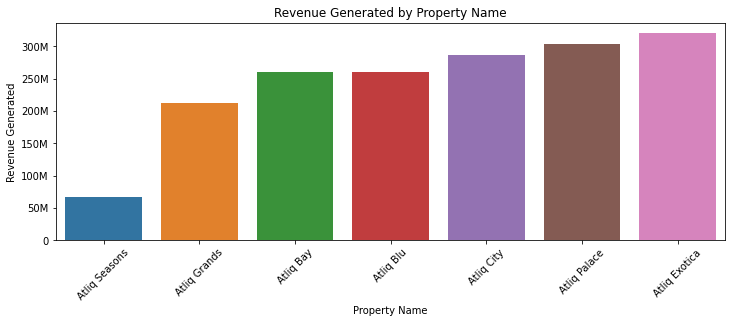

In [569]:
# Plotting
plt.figure(figsize=(12,4))
plot = sns.barplot(x=revenue_by_property.index, y=revenue_by_property.values)
plt.xlabel('Property Name')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by Property Name')
plt.xticks(rotation=45)
plot.set_yticklabels(['0', '50M', '100M', '150M',
                   '200M', '250M', '300M', '350M', '400M'])
plt.show()

#### Revenue by City

In [570]:
revenue_by_city = df.groupby('city')['revenue_realized'].sum().sort_values(ascending = False)
revenue_by_city

city
Mumbai       668640991
Bangalore    420397050
Hyderabad    325232870
Delhi        294500318
Name: revenue_realized, dtype: int64

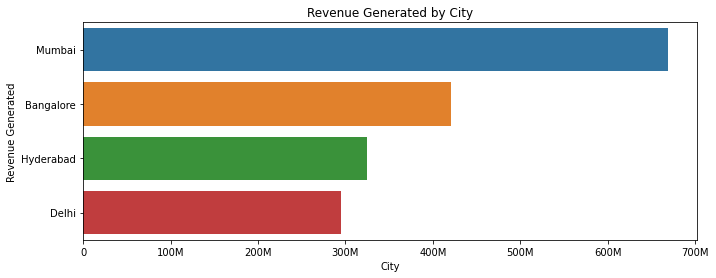

In [571]:
# Plotting
plt.figure(figsize=(11,4))
plot = sns.barplot(x = revenue_by_city.values, y = revenue_by_city.index)
plt.xlabel('City')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by City')
plot.set_xticklabels(['0', '100M', '200M', '300M',
                   '400M', '500M', '600M', '700M', '800M'])
plt.show()

#### Revenue by Room Class

In [572]:
revenue_by_room_class = df.groupby('room_class')['revenue_realized'].sum().reset_index()
revenue_by_room_class

,room_class,revenue_realized
0,Elite,560271204
1,Premium,462166344
2,Presidential,376752786
3,Standard,309580895


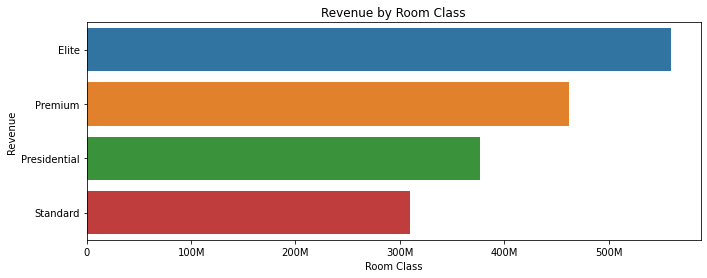

In [573]:
# Plotting
plt.figure(figsize=(11,4))
plot = sns.barplot(y = revenue_by_room_class['room_class'], x = revenue_by_room_class['revenue_realized'])
plt.xlabel('Room Class')
plt.ylabel('Revenue')
plt.title('Revenue by Room Class')
plot.set_xticklabels(['0', '100M', '200M', '300M',
                   '400M', '500M', '600M', '700M', '800M'])
plt.show()

#### Revenue by Month

In [574]:
revenue_by_month = df.groupby('mmm yy')['revenue_realized'].sum().reset_index()
revenue_by_month

,mmm yy,revenue_realized
0,Jul 22,572908208
1,Jun 22,553932355
2,May 22,581930666


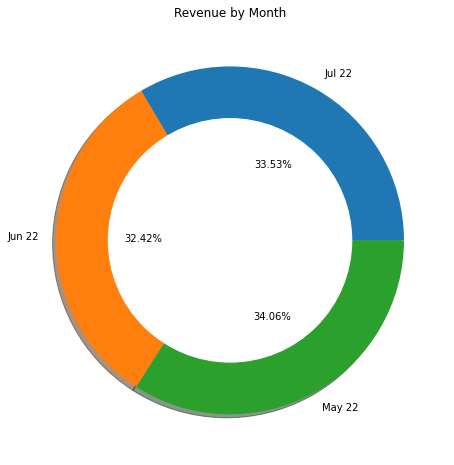

In [575]:
# Plotting
plt.figure(figsize=(8,8))
plt.pie(revenue_by_month['revenue_realized'], labels=revenue_by_month['mmm yy'],
        autopct='%1.2f%%', shadow = True, pctdistance=0.5)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Revenue by Month')
plt.show()

#### Revenue by Week

In [576]:
revenue_by_week = df.groupby('week no')['revenue_realized'].sum().reset_index()
revenue_by_week

,week no,revenue_realized
0,19,138182064
1,20,139435920
2,21,114922175
3,22,138720126
4,23,115568569
5,24,139581703
6,25,138674279
7,26,114152421
8,27,139555632
9,28,139383916


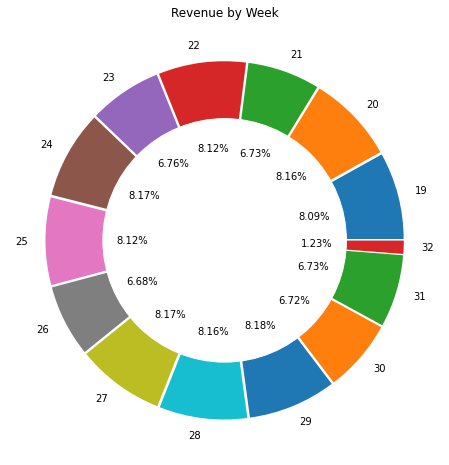

In [577]:
# Plotting
plt.figure(figsize=(8,8))
plt.pie(revenue_by_week['revenue_realized'], labels=revenue_by_week['week no'],
        explode = (np.ones(14)*0.03), autopct='%1.2f%%', shadow = False, pctdistance=0.5)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Revenue by Week')
plt.show()

#### Revenue by Property Name with categorized by Room Class

In [578]:
revenue_by_prop_cat_room = df.groupby(['property_name','room_class'])['revenue_realized'].sum().reset_index()
revenue_by_prop_cat_room

,property_name,room_class,revenue_realized
0,Atliq Bay,Elite,72598410
1,Atliq Bay,Premium,80266656
2,Atliq Bay,Presidential,58234924
3,Atliq Bay,Standard,48951188
4,Atliq Blu,Elite,91225314
5,Atliq Blu,Premium,79465008
6,Atliq Blu,Presidential,39347784
7,Atliq Blu,Standard,50817416
8,Atliq City,Elite,93864618
9,Atliq City,Premium,69790632


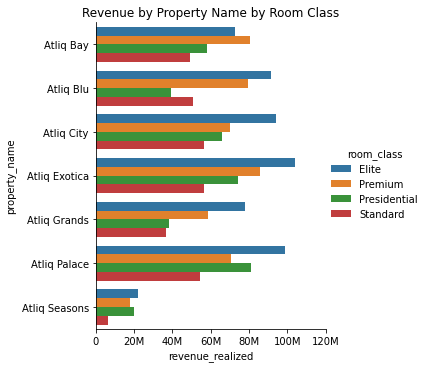

In [579]:
# Plotting
plot = sns.catplot(y="property_name", x="revenue_realized", hue="room_class", data=revenue_by_prop_cat_room, kind="bar")
plt.title('Revenue by Property Name by Room Class')
plot.set_xticklabels(['0', '20M', '40M', '60M',
                   '80M', '100M', '120M', '140M', '160M'])
plt.show()

#### Revenue by Property Name with categorized by City

In [580]:
revenue_by_prop_cat_city = df.groupby(['property_name','city'])['revenue_realized'].sum().reset_index()
revenue_by_prop_cat_city

,property_name,city,revenue_realized
0,Atliq Bay,Bangalore,82443540
1,Atliq Bay,Delhi,56437570
2,Atliq Bay,Hyderabad,69255910
3,Atliq Bay,Mumbai,51914158
4,Atliq Blu,Bangalore,72963360
5,Atliq Blu,Delhi,57933400
6,Atliq Blu,Hyderabad,56040450
7,Atliq Blu,Mumbai,73918312
8,Atliq City,Bangalore,81876345
9,Atliq City,Delhi,54932178


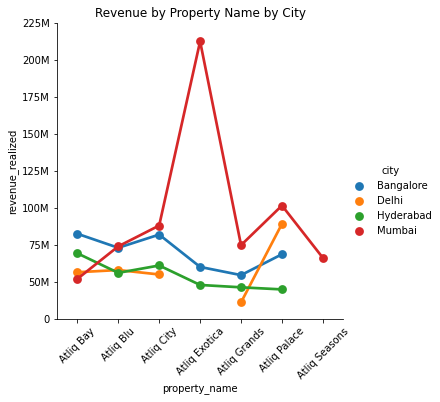

In [588]:
# Plotting
plot = sns.catplot(x="property_name", y="revenue_realized", hue="city", data=revenue_by_prop_cat_city, kind="point")
plt.title('Revenue by Property Name by City')
plot.set_yticklabels(['0', '50M', '75M', '100M',
                   '125M', '150M', '175M', '200M', '225M'])
plt.xticks(rotation = 45)
plt.show()

#### Comparison between Generated & Realized

In [582]:
revenue_comp = df.groupby(['mmm yy'])[['revenue_generated', 'revenue_realized']].sum().reset_index()
revenue_comp['difference'] = revenue_comp.revenue_generated - revenue_comp.revenue_realized
revenue_comp

,mmm yy,revenue_generated,revenue_realized,difference
0,Jul 22,671724125,572908208,98815917
1,Jun 22,651939535,553932355,98007180
2,May 22,683882555,581930666,101951889


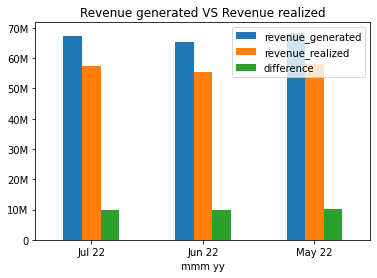

In [583]:
# Plotting
plot = revenue_comp.plot(y=["revenue_generated", "revenue_realized", "difference"], x='mmm yy', kind = 'bar', rot = 0)
plt.title('Revenue generated VS Revenue realized')
plot.set_yticklabels(['0', '10M', '20M', '30M',
                   '40M', '50M', '60M', '70M', '80M'])
plt.show()

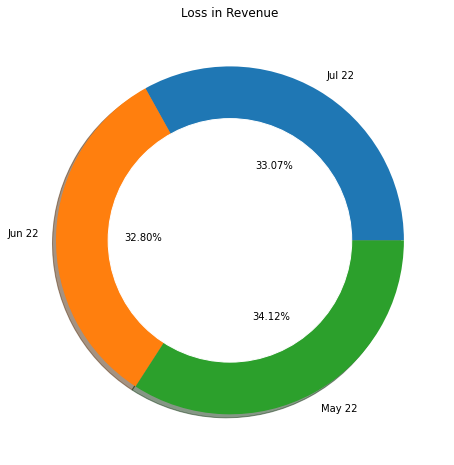

In [584]:
# Plotting
plt.figure(figsize=(8,8))
plt.pie(revenue_comp['difference'], labels=revenue_comp['mmm yy'],
        autopct='%1.2f%%', shadow = True, pctdistance=0.5)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Loss in Revenue')
plt.show()